In [1]:
# # Requerimientos de librerías:
# !pip install spacy
# !python -m spacy download es_core_news_md

# !pip install transformers
# !pip install transformers scipy ftfy accelerate

# !git clone https://github.com/JorgeSauri/COMSINT.git 

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
import numpy as np
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
from recomendaciones_comsint import Recomendador

c:\Users\jsaur\anaconda3\envs\ENV1\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Con tamaño embeddings 128
- CNN de max 512 kernels (v4)

In [4]:
version = 4

recomendador128 = Recomendador(fuente='recetario_mexicano_small.csv',
                            nutricion = 'nutricion.csv',
                            canasta='canasta_basica.csv')

recomendador128.CargarModelo(emb_size=128, version=version)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Modelo Modelos/Modelo_Nut_FV_DistilBERT_04_EMBED-128_CNN.h5 cargado con éxito.


In [48]:
recomendador128.generar_dataset_entrenamiento_nut(df_nutricionales='nutricion.csv', 
                                                  min_ingredientes=5, max_ingredientes=11,
                                                  min_unidades=1, max_unidades=11,
                                                  numero_recetas=1)

Generando 1  recetas aleatorias...



100%|██████████| 1/1 [00:00<00:00, 501.23it/s]


array([['9 gramos de los tazones de microondas gruesos de campbell  sopa de pollo y albóndigas, 4 cucharadas de soja  semillas secas asadas  maduras, 6 piezas de carne de cerdo  estofada  cocinada  separable solo  entera  lomo  fresco, 7 cucharaditas de cordero  asado rápido  cocido  separable delgado y grasa  deshuesado  lomo  importado  nueva zelanda, 6 mililitros de bebidas  enlatado  bebida de uva',
        '1231.32', '0.68', '171.75', '54.95']], dtype='<U395')


ITERACIÓN: 1
min unidades: 5  max unidades: 100
Entrenando desde epoch 0
------------------------------------------

Error al cargar archivos NumPy.
datasets/numpy/10_recetas_random_EMBED-128_DATA_X.npy no existe o está corrupto.
datasets/numpy/10_recetas_random_EMBED-128_DATA_Y.npy no existe o está corrupto.
Generando 10  recetas aleatorias...



100%|██████████| 10/10 [00:00<00:00, 771.32it/s]


Calculando vector de características de 10 recetas...


100%|██████████| 10/10 [00:35<00:00,  3.51s/it]


datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization (BatchN  (None, 128, 768)         3072      
 ormalization)                                                   
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 P

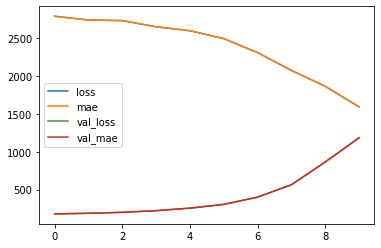

1/1 [==============================] - 0s 213ms/step - loss: 1198.0460 - mae: 1198.0460
[1198.0460205078125, 1198.0460205078125]
1/1 [==============================] - 0s 355ms/step
receta 0 kcal_true: 324.0 kcal_pred: 3378.8325  precisión: 9.6 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 328.27637  precisión: 23.2 %
receta 0 protein_true: 8.0 protein_pred: 188.66974  precisión: 4.2 %
receta 0 total_fat_true: 0.0 total_fat_pred: 217.45724  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 4404.321  precisión: 9.9 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 455.58685  precisión: 21.1 %
receta 1 protein_true: 8.0 protein_pred: 245.71147  precisión: 3.3 %
receta 1 total_fat_true: 4.0 total_fat_pred: 278.1735  precisión: 1.4 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 7006.471  precisión: 12.1 %
receta 2 carbohydrate_true:

100%|██████████| 10/10 [00:00<00:00, 666.64it/s]


Calculando vector de características de 10 recetas...


100%|██████████| 10/10 [00:30<00:00,  3.05s/it]

datasets/numpy/9_TEST_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/9_TEST_EMBED-128_DATA_Y.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_X.npy cargado con éxito.
datasets/numpy/7_VAL_EMBED-128_DATA_Y.npy cargado con éxito.
Model: "ModeloCNNNut_128"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CapaEntrada (InputLayer)    [(None, 98304)]           0         
                                                                 
 RESHAPING (Reshape)         (None, 128, 768)          0         
                                                                 
 batch_normalization_1 (Batc  (None, 128, 768)         3072      
 hNormalization)                                                 
                                                                 
 CONV_1 (Conv1D)             (None, 124, 512)          1966592   
                                                                 
 POOLING_1 (MaxPooling1D)    (None, 123, 512)          0         
                                                                 
 CONV_2 (Conv1D)             (None, 121, 256)          393472    
                                                                 
 POOLING_2

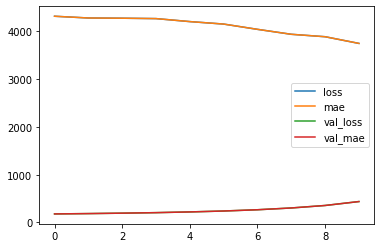

1/1 [==============================] - 0s 216ms/step - loss: 373.1422 - mae: 373.1422
[373.1422424316406, 373.1422424316406]
1/1 [==============================] - 0s 151ms/step
receta 0 kcal_true: 324.0 kcal_pred: 1502.4758  precisión: 21.6 %
receta 0 carbohydrate_true: 76.0 carbohydrate_pred: 136.39561  precisión: 55.7 %
receta 0 protein_true: 8.0 protein_pred: 83.0322  precisión: 9.6 %
receta 0 total_fat_true: 0.0 total_fat_pred: 91.46479  precisión: 0.0 %
---------------------------------------------------------------------------
receta 1 kcal_true: 436.0 kcal_pred: 1538.0172  precisión: 28.3 %
receta 1 carbohydrate_true: 96.0 carbohydrate_pred: 158.78827  precisión: 60.5 %
receta 1 protein_true: 8.0 protein_pred: 91.01615  precisión: 8.8 %
receta 1 total_fat_true: 4.0 total_fat_pred: 83.83444  precisión: 4.8 %
---------------------------------------------------------------------------
receta 2 kcal_true: 846.0 kcal_pred: 2977.1545  precisión: 28.4 %
receta 2 carbohydrate_true: 72.

100%|██████████| 10/10 [00:00<00:00, 668.45it/s]


Calculando vector de características de 10 recetas...


 40%|████      | 4/10 [00:13<00:20,  3.38s/it]


KeyboardInterrupt: 

In [41]:
recomendador128.NUM_RECETAS = 1000
recomendador128.EMB_SIZE = 128
ITER = 5
INITIAL_EPOCH = 0
EPOCHS = 50

Histories = []
for iteracion in range(ITER):
  MINU = 1 
  MAXU = 11   
  print('\nITERACIÓN:', iteracion+1)
  print('min unidades:',MINU, ' max unidades:', MAXU)
  print('Entrenando desde epoch', INITIAL_EPOCH)
  print('------------------------------------------\n')
  modelo128, history = recomendador128.EntrenarModelo(df_nutricionales='nutricion.csv',
                                #df_training='recipes_con_info_nutricional.csv',
                                df_test='recetas_test.csv', 
                                df_val='recetas_val.csv',
                                learning_rate=1e-4,
                                version=version, 
                                initial_epoch = INITIAL_EPOCH,                             
                                epochs=INITIAL_EPOCH + EPOCHS, 
                                kernels=128,                                             
                                min_ingredientes=5, max_ingredientes=11,
                                min_unidades=MINU, max_unidades=MAXU,                               
                                save=True, verbose=True)
  INITIAL_EPOCH = history.epoch[-1]

  Histories.append(history)


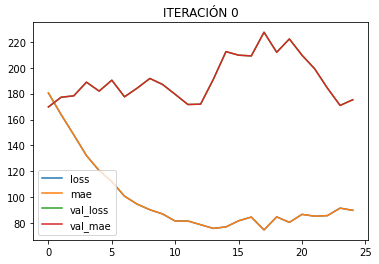

LOSS: 89.82654571533203  -- MAE: 89.82654571533203  -- VAL_LOSS: 175.2900390625  -- VAL_MAE: 175.2900390625
----------------------------------------------------------


In [12]:
for i in range(len(Histories)):
    history = Histories[i]    
    pd.DataFrame(history.history).plot()
    plt.title('ITERACIÓN ' + str(i))
    plt.show()
    print('LOSS:',history.history['loss'][-1], ' -- MAE:', history.history['mae'][-1], 
          ' -- VAL_LOSS:', history.history['val_loss'][-1], ' -- VAL_MAE:', history.history['val_mae'][-1])
    print('----------------------------------------------------------')